<a href="https://colab.research.google.com/github/tarangar22/ece-gy-7123/blob/main/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
import torch

drive.mount('mount/')
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
print(device)

Drive already mounted at mount/; to attempt to forcibly remount, call drive.mount("mount/", force_remount=True).
cuda:0


In [66]:
from torchvision.transforms.transforms import Resize
import torchvision as tv
import torch.nn.functional as F

transform = tv.transforms.Compose([
            tv.transforms.ToTensor(),
            tv.transforms.Resize(size=64),
            tv.transforms.Normalize(mean = [0.5], std = [0.5])
            ])

batch_size = 256

img_train = tv.datasets.MNIST('mount/MyDrive/MNIST/',train=True,download=True, transform=transform)
img_test = tv.datasets.MNIST('mount/MyDrive/MNIST/',train=False,download=True, transform=transform)

In [67]:
imgtrainDataLoader = torch.utils.data.DataLoader(img_train, batch_size=batch_size,shuffle=True)
imgtestDataLoader = torch.utils.data.DataLoader(img_test, batch_size=batch_size,shuffle=True)

In [68]:
embeddings = torch.tensor([[0.13789, -0.082023, -0.024063, -0.15281, 0.046058, -0.10019, -0.53773, -0.15619, 0.19325, -0.13289, -0.37118, 0.44127, -0.045906, 0.081568, -0.23634, 0.29798, 0.26931, -0.17074, -0.64191, 0.72492, -0.25866, -0.21439, -0.27259, 0.5384, -0.54507, -0.12678, 0.026798, -0.29396 -1.2561, 0.011758, 0.062102, 0.26696, -0.039055, -0.05358, -0.19834, 0.66812, 0.36167, 0.022563, -0.48007, 0.020915, 0.36361, 0.44355, -0.33707, 0.25844, 0.41912, 0.12304, 0.26164, -0.70463, -0.13345, 0.22076, -0.023628, -0.44268, -0.68194, 0.50265, -0.1173, -0.2158, 0.093252, -0.097717, -0.30219, 0.32773, 0.3862, 0.14392, 0.35708, 0.19674, 0.20456, 0.08199, -0.26764, -0.14668, -0.36806, 0.090448, -0.06635, -0.13564, -0.031791, 0.072339, -0.24469, -0.23002, 0.23149, -0.15984, 0.50286, 0.11342, 0.29648, -0.3093, 0.20328, -0.054387, 0.077219, -0.26263, -0.11648, 0.19151, 0.57696, 0.54872, -0.13963, -0.14862, 0.12076, 0.054555, -0.96485, -0.0091414, 0.0038731, -0.2293, 0.17762, -0.53787, 0], 
         [0.011429, 0.32352, 0.27902, 0.17275, -0.082463, 0.11233, -0.25549, 0.0034458, 0.17855, 0.0051739, 0.06078, 0.13978, 0.13556, -0.064667, -0.069401, 0.056308, -0.20018, -0.065468, -0.067409, 0.1446, 0.075913, -0.0216, -0.090307, -0.11349, -0.087398, -0.097281, 0.23182, -0.0082377, -0.27121, -0.11043, 0.096559, 0.051001, -0.17488, -0.00041585, -0.021603, 0.30771, 0.10037, 0.15556, -0.096717, -0.047773, -0.14105, -0.13667, 0.058004, 0.23635, 0.37626, -0.19243, 0.30307, 0.15044, -0.032823, -0.058904, -0.24748, -0.25283, 0.029689, 0.25445, -0.18907, -0.024603, 0.025218, -0.055021, -0.063294, 0.19082, 0.15418, 0.25014, 0.11968, 0.2771, 0.21031, -0.012057, -0.14546, 0.11013, -0.21672, -0.17251, 0.17469, 0.10827, 0.051084, 0.17718, -0.4129, 0.11696, 0.31294, 0.097275, 0.37475, 0.047294, 0.065534, -0.28538, 0.10735, -0.003909, 0.18174, 0.0076819, 0.12023, 0.15679, 0.13977, -0.002888, 0.061368, -0.17401, 0.29136, -0.22407, -0.24073, -0.10089, -0.1273, 0.097538, -0.090787, -0.045004],
         [-0.015377, 0.10813, 0.38066, 0.33838, -0.21334, 0.18567, -0.39761, -0.044325, 0.016733, 0.13922, -0.1435, 0.061311, 0.095211, 0.11144, 0.079114, 0.3963, -0.019593, 0.099399, -0.34796, 0.35089, 0.39996, 0.075036, -0.17294, 0.072942, -0.24462, 0.044911, -0.035408, -0.086853, -0.6498, -0.21297, -0.044163, 0.022882, 0.08937, 0.021626, -0.022139, 0.13392, 0.29942, 0.098097, -0.3746, 0.011014, -0.074381, -0.14643, -0.038977, 0.26226, 0.62881, 0.012916, 0.33884, 0.10671, 0.013285, 0.20095, -0.35106, -0.25571, -0.084641, 0.11277, -0.23258, -0.039435, -0.084373, 0.036817, -0.12017, 0.013318, 0.15505, 0.51634, 0.20133, 0.24664, 0.15392, 0.54091, -0.26523, 0.16319, -0.091526, -0.27685, 0.37704, -0.079514, -0.20109, 0.4918, -0.020926, 0.03239, 0.21622, 0.090029, 0.49808, 0.13445, 0.13014, -0.24831, 0.25132, -0.29323, -0.0075617, 0.017205, -0.013196, 0.30178, 0.27723, -0.018852, 0.26658, -0.028337, 0.35813, -0.08761, -0.24439, -0.060219, 0.10811, -0.11765, 0.17857, -0.17295], 
         [0.11008, 0.10876, 0.39747, 0.34684, -0.22324, 0.4418, -0.34545, 0.036077, 0.10518, 0.098134, -0.072256, 0.14298, -0.083699, -0.041381, -0.012376, 0.299, -0.072142, 0.13889, -0.30941, 0.48436, 0.39857, 0.012321, 0.064, 0.14892, -0.10237, -0.062229, -0.11278, 0.056651, -0.67531, -0.15577, -0.14469, -0.15754, 0.15668, 0.10351, 0.02522, 0.11482, 0.25983, 0.14375, -0.23306, -0.18589, -0.10483, -0.11225, -0.13807, 0.23153, 0.48006, -0.0023906, 0.40912, -0.093081, 0.087986, 0.23112, -0.40504, -0.14922, -0.055871, 0.16584, -0.1096, -0.062602, -0.086862, 0.079011, -0.13741, 0.15297, 0.36415, 0.52443, 0.22792, 0.12499, 0.18816, 0.61128, -0.31208, 0.28794, -0.34306, -0.22755, 0.37177, -0.27978, -0.16523, 0.60063, -0.018195, 0.02244, 0.086674, -0.1146, 0.62568, 0.19068, 0.14853, -0.24945, 0.30698, -0.16684, -0.051711, 0.12487, 0.11932, 0.32567, 0.43354, 0.067033, 0.19781, -0.020685, 0.07634, -0.0971, -0.15481, 0.00091962, 0.10931, -0.11483, 0.20528, -0.16981], 
         [0.21926, 0.11598, 0.46916, 0.16768, -0.2114, 0.40752, -0.17844, 0.016412, 0.059186, 0.012794, -0.16885, 0.10169, 0.089389, 0.11604, -0.0025152, 0.36958, 0.15269, 0.092562, -0.47317, 0.40315, 0.19623, -0.01134, -0.21572, 0.35915, -0.1539, 0.029653, -0.095154, 0.043335, -0.87649, -0.0031526, -0.1502, -0.067276, 0.090244 -2.9681e-05, -0.057696, 0.24206, 0.25237, 0.21121, -0.31735, -0.17605, -0.11889, -0.10354, -0.14249, 0.18012, 0.60192, -0.0014103, 0.26107, 0.05551, 0.091524, 0.30512, -0.497, -0.11061, -0.070855, 0.20367, -0.12971, -0.15752, 0.011188, 0.30529, -0.18962, 0.058013, 0.33806, 0.56827, 0.28368, 0.23222, -0.026775, 0.61647, -0.22284, 0.18382, -0.40216, -0.24364, 0.45483, -0.40119, -0.27308, 0.40004, -0.072968, -0.068645, 0.23174, 0.15994, 0.694, -0.04278, 0.24477, -0.022962, 0.1817, -0.087514, 0.032896, 0.26171, 0.22863, 0.26593, 0.591, 0.17978, 0.075403, -0.0081409, 0.26163, -0.034089, -0.4232, -0.069956, 0.0056897, -0.10849, 0.2353, -0.06064, 0], 
         [0.29514, 0.2499, 0.36973, 0.025861, -0.20658, 0.50415, -0.20373, 0.069459, -0.075625, -0.16278, -0.15054, 0.20802, 0.06414, 0.057649, -0.080162, 0.23273, 0.11602, 0.12881, -0.45799, 0.33624, 0.24667, 0.010297, -0.1945, 0.080387, -0.37344, 0.026762, -0.056671, 0.046723, -0.82182, 0.16037, -0.18026, -0.070244, 0.040697, 0.12229, -0.026376, 0.15608, 0.53302, 0.26848, -0.34031, -0.24298, -0.09846, -0.14092, -0.40341, 0.2408, 0.48255, -0.046739, 0.34181, -0.029145, 0.15284, 0.21369, -0.43346, -0.072775, -0.14418, 0.19885, -0.20126, -0.22619, -0.15885, -0.044785, -0.10527, 0.01745, 0.19814, 0.56764, 0.34502, 0.20174, -0.043927, 0.4879, -0.48348, 0.037302, -0.56727, -0.22128, 0.34285, -0.5489, -0.47616, 0.35611, -0.17654, -0.051533, 0.077893, -0.1768, 0.65229, 0.15351, 0.18556, -0.091162, 0.13019, 0.1095, 0.098639, 0.028876, -0.11406, 0.53086, 0.62785, -0.004573, 0.13334, 0.076306, -0.016896, -0.2191, -0.44764, -0.12589, -0.097033, -0.21634, 0.11719, 0.0016476], 
         [0.23955, 0.090919, 0.2611, -0.038606, -0.16518, 0.73973, -0.30849, 0.14976, 0.13196, -0.18021, 0.1193, 0.12558, -0.0028301, 0.008304, 0.0034584, 0.43184, 0.05229, 0.034984, -0.52182, 0.47153, 0.38834, 0.0034653, -0.13179, 0.32009, -0.2553, -0.10289, -0.088785, 0.19759, -0.98597, 0.17302, -0.15329, -0.021406, 0.029726, 0.042956, -0.046123, 0.30211, 0.29299, 0.23831, -0.1933, -0.30595, -0.14704, -0.20124, -0.3655, 0.28134, 0.57987, -0.14834, 0.052247, 0.10314, 0.19907, 0.34276, -0.52507, -0.13883, -0.21739, 0.40617, -0.13317, -0.098311, -0.034178, 0.20695, -0.19455, 0.25622, 0.31757, 0.58188, 0.21222, 0.37919, 0.073276, 0.7806, -0.29315, 0.1758, -0.51767, -0.2821, 0.57785, -0.24948, -0.42993, 0.38576, -0.09206, 0.031803, -0.17402, -0.084189, 0.45833, -0.086565, 0.23216, -0.16097, 0.23237, 0.050568, -0.0025897, 0.099758, 0.15994, 0.14771, 0.74204, 0.29316, 0.22724, -0.079035, -0.038565, -0.04777, -0.55643, -0.15533, 0.10944, -0.4829, 0.066475, -0.1247],
         [0.29987, -0.0092091, -0.048593, 0.14572, -0.13082, 0.24188, -0.08578, 0.25356, 0.27296, -0.21296, -0.035735, 0.35304, 0.084012, -0.18102, 0.040573, 0.45597, 0.22686, -0.082421, -0.31308, 0.27579, 0.38027, 0.021854, -0.13564, 0.23704, -0.38442, -0.10972, -0.08435, -0.1805, -0.90329, 0.28769, -0.14513, -0.039775, 0.24331, 0.179, -0.30635, 0.13629, 0.41187, 0.11477, -0.45156, -0.18332, -0.087843, -0.18125, -0.36259, 0.34343, 0.46993, -0.2361, 0.29171, -0.12634, -0.10551, 0.33467, -0.44776, -0.05984, 0.13159, 0.51499, 0.036808, 0.21542, 0.009846, 0.21221, -0.10314, 0.15485, 0.39304, 0.39436, 0.54885, 0.3307, 0.098086, 0.63649, -0.24876, 0.20488, -0.36947, -0.19809, 0.47624, -0.23743, -0.51604, 0.39983, 0.13063, 0.052472, 0.24134, -0.04784, 0.43156, -0.09715, 0.25108, -0.23057, 0.31407, 0.068351, -0.13976, 0.015934, 0.36423, 0.28052, 0.46042, 0.054664, 0.0077496, -0.011356, 0.005771, 0.15169, -0.76866, -0.22568, 0.27139, -0.026898, 0.22341, -0.18207], 
         [0.31319, 0.053275, 0.23647, -0.19163, 0.024885, 0.47905, -0.32384, 0.076582, 0.38779, -0.29294, 0.012603, 0.4325, 0.1042, 0.065016, 0.0053638, 0.52642, 0.29514, 0.065922, -0.65663, 0.42703, 0.24233, -0.1316, -0.13289, 0.45684, -0.13846, -0.022727, -0.062103, 0.23098, -0.99408, 0.023508, -0.12218, 0.058201, -0.10816, 0.30967, -0.12492, 0.073759, 0.3856, 0.19362, -0.46622, -0.16521, 0.03294, 0.0090965, -0.19028, 0.051722, 0.54652, -0.06613, 0.29769, -0.051316, -0.01001, 0.4134, -0.499, -0.034312, -0.33347, 0.43149, -0.083404, 0.081145, 0.0098851, 0.2043, -0.19942, 0.23862, 0.39645, 0.56138, 0.33588, 0.36449, 0.023534, 0.60053, -0.51969, 0.30185, -0.615, -0.17511, 0.35013, -0.24465, -0.21177, 0.51611, -0.15951, 0.054172, -0.07022, -0.18309, 0.33142, -0.0082101, 0.26637, -0.061767, 0.27254, 0.13157, -0.18951, -0.12682, 0.19974, 0.40045, 0.80086, 0.068142, -0.0085216, -0.12586, -0.077415, -0.096283, -0.59739, -0.1552, -0.0089264, -0.31336, 0.25482, -0.19711], 
         [0.48793, 0.1219, -0.030168, 0.030582, 0.10949, 0.34003, -0.13203, -0.0024512, 0.65972, -0.1841, 0.20399, 0.36351, -0.10829, -0.080902, 0.17341, 0.53607, 0.4818, 0.0093803, -0.69547, 0.34836, 0.38758, 0.048309, 0.04956, 0.35197, -0.14896, -0.01856, 0.00061835, -0.011825, -0.79233, 0.04189, -0.13655, 0.062351, 0.074205, 0.18608, -0.050066, 0.099029, 0.2218, 0.26855, -0.576, -0.1926, 0.22246, -0.31715, -0.62688, 0.32577, 0.48611, -0.27969, 0.24088, -0.13699, -0.30188, 0.35425, -0.41193 -4.3895e-05, -0.11012, 0.44424, -0.19225, 0.12604, 0.20591, 0.26962, -0.051973, 0.44879, 0.38571, 0.43985, 0.42502, 0.51236, 0.0981, 0.25419, -0.22565, 0.45125, -0.4631, -0.053343, 0.4274, -0.24307, -0.63858, 0.27147, 0.099676, 0.075004, -0.015129, -0.20673, 0.40236, -0.12143, 0.1379, 0.01195, 0.36311, 0.10376, -0.37641, -0.061818, 0.12933, 0.41055, 0.6092, 0.19674, -0.063274, -0.042287, -0.091948, -0.14508, -0.5465, -0.28886, 0.12263, -0.27758, 0.19076, -0.48461, 0]]).to(device)

In [69]:
# channel
nc = 1
# latent vector
nz = 256
# generator feature maps
ngf = 64
# discriminator feature map
ndf = 64
# gpu
ngpu = 1
# class
n_classes = 10

In [70]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0)

In [71]:
class Generator(torch.nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.label_cg = torch.nn.Sequential(torch.nn.Embedding(n_classes, 100),
                      torch.nn.Linear(100, 1))  

        self.latent = torch.nn.Sequential(torch.nn.Linear(nz, 1*1*256),
                                    torch.nn.LeakyReLU(0.2, inplace=False))

        self.main = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(257, ngf * 8, 4, 1, 0, bias=False), # 4, 4
            torch.nn.BatchNorm2d(ngf * 8),
            torch.nn.LeakyReLU(0.2, inplace=False),
            torch.nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False), # 8, 8
            torch.nn.BatchNorm2d(ngf * 4),
            torch.nn.LeakyReLU(0.2, inplace=False),
            torch.nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False), # 16, 16
            torch.nn.BatchNorm2d(ngf * 2),
            torch.nn.LeakyReLU(0.2, inplace=False),
            torch.nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False), # 32, 32
            torch.nn.BatchNorm2d(ngf),
            torch.nn.LeakyReLU(0.2, inplace=False),
            torch.nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False), # 64, 64
            torch.nn.Tanh()
        )

    def forward(self, latent, label):
        label = self.label_cg(label)
        label = label.view(-1, 1, 1, 1)
        latent = self.latent(latent)
        latent = latent.view(-1, 256, 1, 1)
        concat = torch.cat((latent, label), dim=1)
        return self.main(concat)

#if (device.type == 'cuda') and (ngpu > 1):
    #netG = nn.DataParallel(netG, list(range(ngpu)))

netG = Generator(ngpu).to(device)
netG.label_cg[0].weight.data.copy_(embeddings)
netG.apply(weights_init)

Generator(
  (label_cg): Sequential(
    (0): Embedding(10, 100)
    (1): Linear(in_features=100, out_features=1, bias=True)
  )
  (latent): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (main): Sequential(
    (0): ConvTranspose2d(257, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), s

In [72]:
class Discriminator(torch.nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.label_cd = torch.nn.Sequential(torch.nn.Embedding(n_classes, 100),
                                                        torch.nn.Linear(100, 1*64*64))
        self.drop = torch.nn.Dropout(p=0.5, inplace=False)
        self.main = torch.nn.Sequential(
            torch.nn.Conv2d(nc*2, ndf, 4, 2, 1, bias=False), # 64, 64
            torch.nn.LeakyReLU(0.2, inplace=True),
            torch.nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False), # 32, 32
            torch.nn.BatchNorm2d(ndf * 2),
            torch.nn.LeakyReLU(0.2, inplace=True),
            torch.nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False), # 16, 16
            torch.nn.BatchNorm2d(ndf * 4),
            torch.nn.LeakyReLU(0.2, inplace=True),
            torch.nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False), # 4, 4
            torch.nn.BatchNorm2d(ndf * 8),
            torch.nn.LeakyReLU(0.2, inplace=True),
            torch.nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False), # 1, 1
            torch.nn.Sigmoid()
        )

    def forward(self, img, label):
        label = self.label_cd(label)
        label = label.view(-1, 1, 64, 64)
        concat = torch.cat((self.drop(img), label), dim=1)
        #print(concat.size())
        return self.main(concat)

#if (device.type == 'cuda') and (ngpu > 1):
    #netD = nn.DataParallel(netD, list(range(ngpu)))

netD = Discriminator(ngpu).to(device)
netD.label_cd[0].weight.data.copy_(embeddings)
netD.apply(weights_init)

Discriminator(
  (label_cd): Sequential(
    (0): Embedding(10, 100)
    (1): Linear(in_features=100, out_features=4096, bias=True)
  )
  (drop): Dropout(p=0.5, inplace=False)
  (main): Sequential(
    (0): Conv2d(2, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(n

In [73]:
criterion = torch.nn.BCELoss()

real_label = 0.9
fake_label = 0.1

optimizerD = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999), amsgrad=False)
optimizerG = torch.optim.Adam(netG.parameters(), lr=0.0005, betas=(0.5, 0.999), amsgrad=False)

torch.autograd.set_detect_anomaly(True)

In [76]:
img_list = []
G_loss = []
D_loss = []
num = 20
iters = 0

print("Starting Training Loop...")
for epoch in range(num):
    for i, data in enumerate(imgtrainDataLoader, 0):
        real_cpu, tag = data
        real_cpu = real_cpu.to(device)
        tag = tag.to(device).unsqueeze(1).long()
        b_size = data[0].size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float).to(device)

        netD.zero_grad()
        output = netD(real_cpu, tag).squeeze()
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(b_size, nz).to(device)
        fake = netG(noise, tag)
        label.fill_(fake_label)
        output = netD(fake, tag).squeeze()
        errD_fake = criterion(output, label)
        errD_fake.backward(retain_graph=True)
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake, tag).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        if i == len(imgtrainDataLoader)-1:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num, i, len(imgtrainDataLoader)-1,
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        G_loss.append(errG.item())
        D_loss.append(errD.item())

        if i == len(imgtrainDataLoader)-1:
            with torch.no_grad():
                noise = torch.randn(b_size, nz).to(device)
                fake = netG(noise, tag)
            img_list.append(tv.utils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/20][234/234]	Loss_D: 0.8672	Loss_G: 1.6731	D(x): 0.7440	D(G(z)): 0.2519 / 0.1783
[1/20][234/234]	Loss_D: 0.8086	Loss_G: 1.5682	D(x): 0.7431	D(G(z)): 0.1716 / 0.1971
[2/20][234/234]	Loss_D: 0.8071	Loss_G: 1.8801	D(x): 0.8617	D(G(z)): 0.2824 / 0.1458
[3/20][234/234]	Loss_D: 0.7695	Loss_G: 1.5582	D(x): 0.7661	D(G(z)): 0.1431 / 0.2017
[4/20][234/234]	Loss_D: 0.7686	Loss_G: 1.9224	D(x): 0.8215	D(G(z)): 0.1875 / 0.1362
[5/20][234/234]	Loss_D: 0.7396	Loss_G: 2.1953	D(x): 0.8550	D(G(z)): 0.2100 / 0.0958
[6/20][234/234]	Loss_D: 1.0667	Loss_G: 1.5483	D(x): 0.5741	D(G(z)): 0.0272 / 0.2020
[7/20][234/234]	Loss_D: 0.8101	Loss_G: 2.3798	D(x): 0.7419	D(G(z)): 0.0950 / 0.0923
[8/20][234/234]	Loss_D: 0.9587	Loss_G: 1.8081	D(x): 0.8146	D(G(z)): 0.3964 / 0.1488
[9/20][234/234]	Loss_D: 0.9036	Loss_G: 3.2301	D(x): 0.8723	D(G(z)): 0.3616 / 0.0335
[10/20][234/234]	Loss_D: 0.7730	Loss_G: 2.3350	D(x): 0.7808	D(G(z)): 0.1553 / 0.0855
[11/20][234/234]	Loss_D: 0.8299	Loss_G: 1.9933	D(

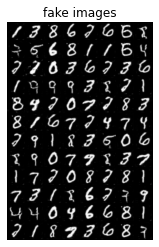

In [77]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(1,2,2)
plt.axis("off")
plt.title("fake images")
plt.imshow(np.transpose(img_list[-1].cpu(),(1,2,0)))
plt.show()

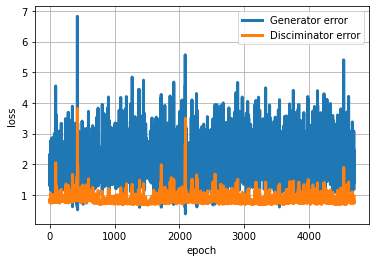

In [78]:
plt.plot(range(len(G_loss)),G_loss,'-',linewidth=3,label='Generator error')
plt.plot(range(len(D_loss)),D_loss,'-',linewidth=3,label='Disciminator error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()